## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
results = {}
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
for i in range(3):
    # 載入 Callbacks
    if i == 0:
        model_ckpt = ModelCheckpoint(filepath="./tmp0.h5", monitor="val_loss")
        exp_name_tag = "exp-original"
    elif i == 1:
        model_ckpt = ModelCheckpoint(filepath="./tmp1.h5", monitor="val_loss", save_best_only=True)
        exp_name_tag = "exp-saveBest"
    else:
        model_ckpt = ModelCheckpoint(filepath="./tmp2.h5", monitor="val_loss", save_weights_only=True)
        exp_name_tag = "exp-saveWeight"
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True, callbacks=[model_ckpt])
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    results[exp_name_tag] = {'train-loss': train_loss, 'valid-loss': valid_loss, 'train-acc': train_acc, 'valid-acc': valid_acc}
    # Load back
    try:
        model = keras.models.load_model("./tmp"+str(i)+".h5")
        loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
        print('Loss:%f Accu:%f'%(loss_loadback, acc_loadback))
    except:
        print('load failed')





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
______

50000/50000 [==============================] - 7s 143us/step - loss: 0.9573 - acc: 0.6783 - val_loss: 1.4611 - val_acc: 0.4906
Epoch 27/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.9358 - acc: 0.6869 - val_loss: 1.4574 - val_acc: 0.4976
Epoch 28/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.9173 - acc: 0.6956 - val_loss: 1.4666 - val_acc: 0.4962
Epoch 29/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.8992 - acc: 0.7020 - val_loss: 1.4738 - val_acc: 0.4967
Epoch 30/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.8782 - acc: 0.7099 - val_loss: 1.4752 - val_acc: 0.4979
Epoch 31/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.8580 - acc: 0.7177 - val_loss: 1.4911 - val_acc: 0.4921
Epoch 32/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.8400 - acc: 0.7238 - val_loss: 1.4996 - val_acc: 0.4944
Epoch 33/50
50000/50000 [==============

50000/50000 [==============================] - 7s 145us/step - loss: 0.9815 - acc: 0.6701 - val_loss: 1.4461 - val_acc: 0.4949
Epoch 25/50
50000/50000 [==============================] - 7s 144us/step - loss: 0.9613 - acc: 0.6787 - val_loss: 1.4541 - val_acc: 0.4930
Epoch 26/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.9403 - acc: 0.6870 - val_loss: 1.4827 - val_acc: 0.4880
Epoch 27/50
50000/50000 [==============================] - 7s 145us/step - loss: 0.9198 - acc: 0.6947 - val_loss: 1.4680 - val_acc: 0.4986
Epoch 28/50
50000/50000 [==============================] - 7s 149us/step - loss: 0.8993 - acc: 0.7029 - val_loss: 1.4742 - val_acc: 0.4979
Epoch 29/50
50000/50000 [==============================] - 8s 154us/step - loss: 0.8803 - acc: 0.7098 - val_loss: 1.4671 - val_acc: 0.4968
Epoch 30/50
50000/50000 [==============================] - 8s 153us/step - loss: 0.8599 - acc: 0.7180 - val_loss: 1.4757 - val_acc: 0.4933
Epoch 31/50
50000/50000 [==============

50000/50000 [==============================] - 7s 136us/step - loss: 1.0013 - acc: 0.6615 - val_loss: 1.4707 - val_acc: 0.4912
Epoch 23/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.9789 - acc: 0.6714 - val_loss: 1.4766 - val_acc: 0.4833
Epoch 24/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.9574 - acc: 0.6798 - val_loss: 1.4687 - val_acc: 0.4972
Epoch 25/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.9348 - acc: 0.6879 - val_loss: 1.4625 - val_acc: 0.4930
Epoch 26/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.9149 - acc: 0.6961 - val_loss: 1.4943 - val_acc: 0.4948
Epoch 27/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.8942 - acc: 0.7044 - val_loss: 1.4929 - val_acc: 0.4910
Epoch 28/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.8732 - acc: 0.7115 - val_loss: 1.4948 - val_acc: 0.4933
Epoch 29/50
50000/50000 [==============

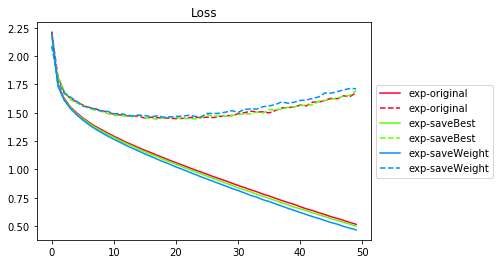

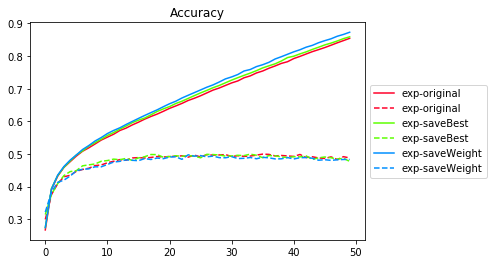

In [8]:
%matplotlib inline
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()